In [1]:
import os
import tarfile
import matplotlib.pyplot as plt
import pandas as pd
import torch
from pathlib import Path
from NeuralNMF import train
from sklearn.feature_extraction.text import TfidfVectorizer
from NeuralNMF import Neural_NMF
import pickle
import scipy.io
import random
import numpy as np
import h5py


np.random.seed(0)
random.seed(0)
torch.manual_seed(0)
torch.use_deterministic_algorithms(True)


In [34]:
def NNMF(dataset,layers,session,timeframes):
    trainS = dataset["ha"]
    session+=1
    layers.insert(0,trainS.shape[0]*timeframes)

    trainData = []
    for i in range(trainS.shape[1]-timeframes+1):
        segment = trainS[:,i:i+timeframes]
        flatt = segment.flatten(order='F')
        trainData.append(flatt)
    trainMatrix = np.array(trainData).T

    train__ = torch.tensor(trainMatrix)
    net = Neural_NMF(layers)
    history = train(net, train__, epoch=10, lr=500, supervised=False)

    A = history[0][len(layers)-2]
    H_full = history[1][len(layers)-2]
    W1 = history[0][0].detach().numpy()
    W = A.detach().numpy()
    S1 = H_full.detach().numpy()



    plt.figure(figsize=(8, 6))
    plt.imshow(W1, cmap='coolwarm', interpolation='nearest')
    plt.colorbar(label="Weight Value")  # Show color scale

    # Axis labels
    plt.xlabel("Lower Level Motifs", fontsize=14, fontweight='bold', fontname='Times New Roman')
    plt.ylabel("Neurons", fontsize=14, fontweight='bold', fontname='Times New Roman')

    # Title for IEEE paper format
    plt.title(r'Heat Map of $W^{(1)}$', fontsize=16, fontweight='bold', fontname='Times New Roman')

    # Font settings for ticks
    plt.xticks(fontsize=12, fontname='Times New Roman')
    plt.yticks(fontsize=12, fontname='Times New Roman')

    # Save figure with high resolution
    plt.savefig('W1.png', dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()





    plt.imshow(W, cmap='coolwarm', interpolation='nearest')
    cbar = plt.colorbar()
    cbar.set_label("Weight Value", fontsize=14, fontweight='bold', fontname='Times New Roman')

    # Axis labels with proper formatting
    plt.xlabel("Higher Level Motifs", fontsize=14, fontweight='bold', fontname='Times New Roman')
    plt.ylabel("Neurons", fontsize=14, fontweight='bold', fontname='Times New Roman')

    # Title formatted for IEEE standard
    plt.title(r'Heat Map of $W^{(2)}$', fontsize=16, fontweight='bold', fontname='Times New Roman')

    # Improve tick labels readability
    plt.xticks(fontsize=12, fontname='Times New Roman')
    plt.yticks(fontsize=12, fontname='Times New Roman')

    # Save high-resolution figure for IEEE paper
    plt.savefig('W.png', dpi=300, bbox_inches='tight')

    # Show plot
    plt.show()





    plt.figure(figsize=(10, 1))

    plt.imshow(S1[:, :100], cmap='coolwarm', interpolation='nearest', aspect='auto')

    # Colorbar with label
    cbar = plt.colorbar()
    cbar.set_label("Activation Value", fontsize=14, fontweight='bold', fontname='Times New Roman')

    # Axis labels
    plt.xlabel("Time", fontsize=14, fontweight='bold', fontname='Times New Roman')
    plt.ylabel("Motifs", fontsize=14, fontweight='bold', fontname='Times New Roman')

    # Title formatted for IEEE standard
    plt.title(r'Heat Map of $H$ Matrix', fontsize=16, fontweight='bold', fontname='Times New Roman')

    # Improve tick labels readability
    plt.xticks(fontsize=12, fontname='Times New Roman')
    plt.yticks(fontsize=12, fontname='Times New Roman')

    # Save high-resolution figure
    plt.savefig('H_full.png', dpi=300, bbox_inches='tight')

    # Show plot
    plt.show()




    





    sums = torch.sum(A@H_full,dim = 0)
    sed = sums.detach().numpy().reshape(1,-1)
    #

    columns_above_threshold = torch.nonzero(torch.tensor(sed) > 0.5, as_tuple=True)[1]
    S2 = (A@H_full).detach().numpy()
    
    slices = []
    for idx in columns_above_threshold:
        if idx + 20 <= S2.shape[1]:
            slices.append(S2[:, idx:idx+10])
        else:
            slices.append(S2[:, idx:])
    C = np.hstack(slices) if slices else np.array([])

    plt.figure(figsize=(10, 1))

    plt.imshow(C[:, :100], cmap='coolwarm', interpolation='nearest', aspect='auto')

    # Add colorbar with label
    cbar = plt.colorbar()
    cbar.set_label("Activation Value", fontsize=14, fontweight='bold', fontname='Times New Roman')

    # Axis Labels
    plt.xlabel("Time", fontsize=14, fontweight='bold', fontname='Times New Roman')
    plt.ylabel("Neural Activity", fontsize=14, fontweight='bold', fontname='Times New Roman')

    # Title formatted for IEEE standard
    plt.title(r'Heatmap of $W^{(2)} \times H$', fontsize=16, fontweight='bold', fontname='Times New Roman')

    # Improve tick labels readability
    plt.xticks(fontsize=12, fontname='Times New Roman')
    plt.yticks(fontsize=12, fontname='Times New Roman')

    # Save high-resolution figure
    plt.savefig(f'heatmap_W2_H.png', dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()





    slices = []
    for idx in columns_above_threshold:
        if idx + 20 <= S1.shape[1]:
            slices.append(S1[:, idx:idx+10])
        else:
            slices.append(S1[:, idx:])
    C = np.hstack(slices) if slices else np.array([])

    plt.figure(figsize=(10, 4))  # Wider figure

    # Plot the heatmap with the adjusted aspect ratio
    plt.imshow(C[:, :100], cmap='coolwarm', interpolation='nearest')  # Remove aspect if not needed

    # Add axis labels
    plt.xlabel("Time", fontsize=14, fontweight='bold', fontname='Times New Roman')
    plt.ylabel("Motifs", fontsize=14, fontweight='bold', fontname='Times New Roman')

    # Title formatted for IEEE standard
    plt.title(r'Heat Map of segmented $H$ Matrix', fontsize=16, fontweight='bold', fontname='Times New Roman')

    # Improve tick labels readability
    plt.xticks(fontsize=12, fontname='Times New Roman')
    plt.yticks(fontsize=12, fontname='Times New Roman')

    # Save high-resolution figure
    plt.savefig(f'H.png', dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()






    return history,W,S1,C

100%|██████████| 10/10 [00:21<00:00,  2.19s/it]


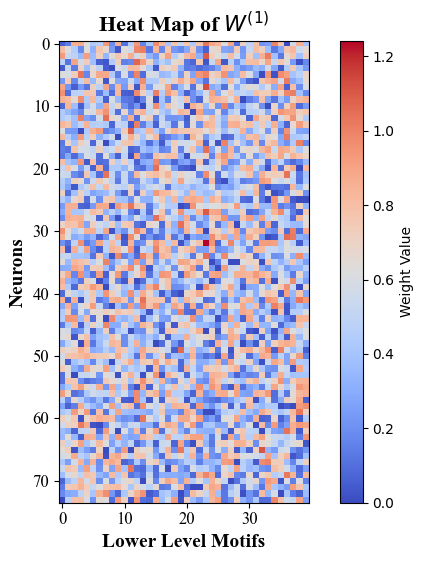

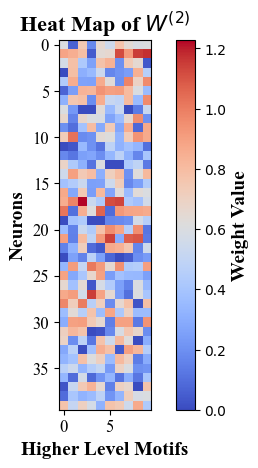

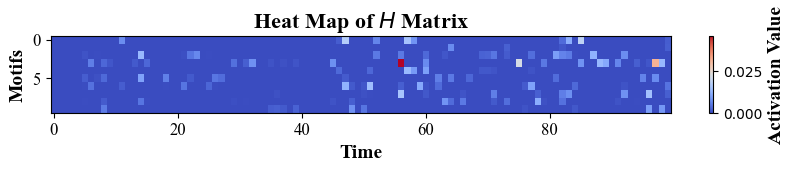

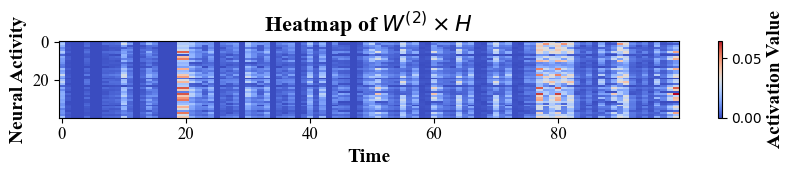

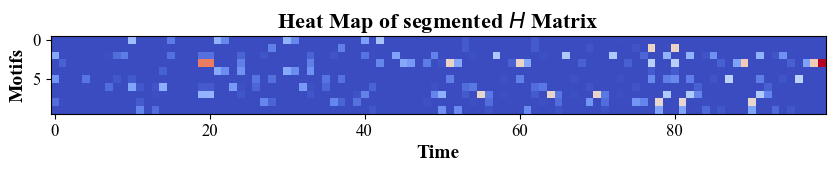

In [36]:
timeframe = 1
for session in range(1,2):
    mat_data = scipy.io.loadmat(rf"C:\Users\ASUS\Downloads\Source Data\matrix{session+1}")
    layers = [40,10]
    history,W,S1,C = NNMF(mat_data,layers,session,timeframe)